<a href="https://colab.research.google.com/github/dasjar/Batch-Stochastic-Perceptron/blob/main/batch_stochastic_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 7a: data generation
We generate two sets of 3-dimensional data points for a classification problem, each set coming from a Gaussian (normal) distribution. Class 1: The data points are drawn from a Gaussian distribution with mean vector
𝜇
1
.
Class 2: The data points are drawn from a Gaussian distribution with mean vector
𝜇
2
. The covariance matrix is the identity matrix
𝐼
, meaning the distributions in each of the three dimensions are uncorrelated and have unit variance.

In [ ]:

np.random.seed(42)  # For reproducibility

n_samples = 25 #number of samples for each distribution
dim = 3 #dimension of data data space--3d

# Define means for the two distributions
mu1 = np.zeros(dim)  # [0, 0, 0]
mu2 = np.array([4, 4, 4])

# Define identity covariance matrix (I)
cov = np.eye(dim)  # 3x3 identity matrix

# Generate Gaussian-distributed samples:
# Class 1: We generate 25 points for Class 1 from the multivariate normal distribution with mean =[0,0,0] and covariance I
# Class 2: We generate 25 points for Class 1 from the multivariate normal distribution with mean = [4,4,4]^T and covariance I
class1 = np.random.multivariate_normal(mu1, cov, n_samples)  # N(mu1, I)
class2 = np.random.multivariate_normal(mu2, cov, n_samples)  # N(mu2, I)

# Combine data from the two distribution into a single training data
X = np.vstack((class1, class2))
y = np.hstack((-np.ones(n_samples), np.ones(n_samples)))  # Class labels: -1 and 1. class 1 has labels -1 and class 2 have labels 1

# display training data
print("X:", X)  # Should be (50, 3)
print("y:", y)  # Should be (50,)


X: [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722]
 [-1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605]
 [ 0.19686124  0.73846658  0.17136828]
 [-0.11564828 -0.3011037  -1.47852199]
 [-0.71984421 -0.46063877  1.05712223]
 [ 0.34361829 -1.76304016  0.32408397]
 [-0.38508228 -0.676922    0.61167629]
 [ 1.03099952  0.93128012 -0.83921752]
 [-0.30921238  0.33126343  0.97554513]
 [-0.47917424 -0.18565898 -1.10633497]
 [-1.19620662  0.81252582  1.35624003]
 [-0.07201012  1.0035329   0.36163603]
 [-0.64511975  0.36139561  1.53803657]
 [-0.03582604  1.56464366 -2.6197451 ]
 [ 4.8219025   4.08704

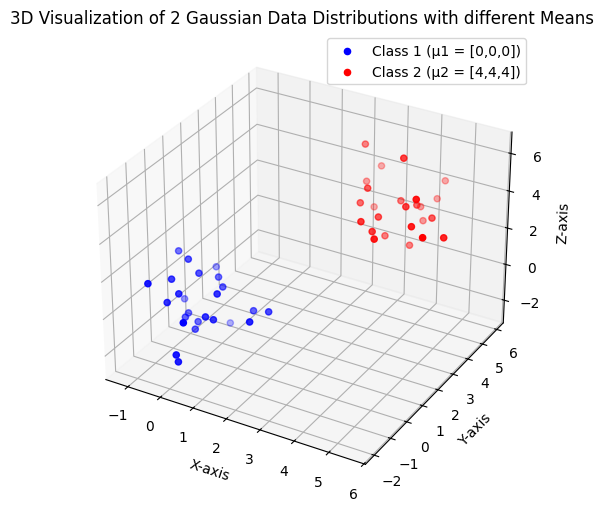

In [ ]:
# 3D Scatter plot visualization of generated data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot class1 (blue) and class2 (red)
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1 = [0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2 = [4,4,4])')

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of 2 Gaussian Data Distributions with different Means')
ax.legend()

plt.show()


## 7b

In [ ]:
# Step 2: Compute β^2
# this is computed by considering the max norm in both classes instead of doing it seperately for each class distribution
beta_2 = max(np.linalg.norm(X, axis=1) ** 2)
print(beta_2)

74.0475599443186


## 7c
I observed that the batch perceptron algorithm did not converge without a bias. After adding a bias, it converged- This goes to show how important a bias term can be as it allows shifting the hyperplane by a scalar term from the origin.Also, I experimented on dynamic learning rate and fixed learning rate. I observed that changing the fixed learning rate (at least for the static values I tried) did not alter the number of iterations needed to converge. I also aobserved that using a fixed was faster to converge with 21 iterations while dynamic learning was slower to converge with 40355 iterations. This may be because the decay rate of the function used in dynamic learning rate is too slow. I also noticed that for the number of times i retried this experiment, the number of iterations needed for convergence did not change for the batch perceptron

i. Fixed learning rate

Converged at iteration 21


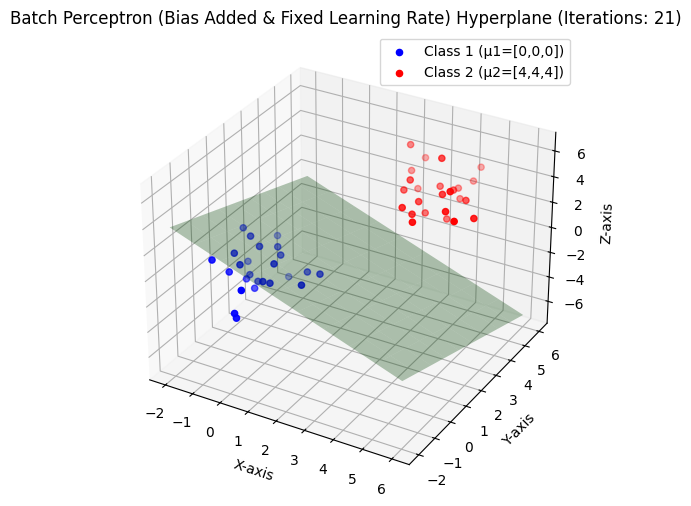

In [ ]:
# Batch Perceptron Algorithm with Iteration Tracking---first implementation
#in this first case, the algorithm did not converge so in the next case,
#we use a stoping criterion theta instead and a dynamic learning rate dependent on the number of iterations
# Batch Perceptron Algorithm with Bias and Iteration Tracking
def batch_perceptron_with_bias(X, y, eta=0.01):
    w = np.zeros(X.shape[1])  # Initialize weight vector
    b = 0  # Initialize bias term
    i =1 #iteration count
    while (True):
        misclassified = y * (w @ X.T + b) <= 0  # Find misclassified points (including bias)

        if not np.any(misclassified):  # If no misclassified points, stop
            print(f'Converged at iteration {i}')
            return w, b, i  # Return final weights, bias, and iteration count

        # Update weights and bias
        w += eta * np.sum(y[misclassified, None] * X[misclassified], axis=0)  # Update weight vector
        b += eta * np.sum(y[misclassified])  # Update bias term
        i+=1
    return w, b, max_iter  # Return weights, bias, and max iterations if not converged

# Train Perceptron with Bias
w_batch, b_batch, iterations = batch_perceptron_with_bias(X, y)

# 3D Visualization of Data and Decision Hyperplane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1=[0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2=[4,4,4])')

# Define hyperplane equation w1*x + w2*y + w3*z + b = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
if w_batch[2] != 0:  # Avoid division by zero
    zz = (-w_batch[0] * xx - w_batch[1] * yy - b_batch) / w_batch[2]
else:
    zz = np.zeros_like(xx)  # In case of vertical hyperplane

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Batch Perceptron (Bias Added & Fixed Learning Rate) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()

ii. Dynamic learning rate

Converged at iteration 40355


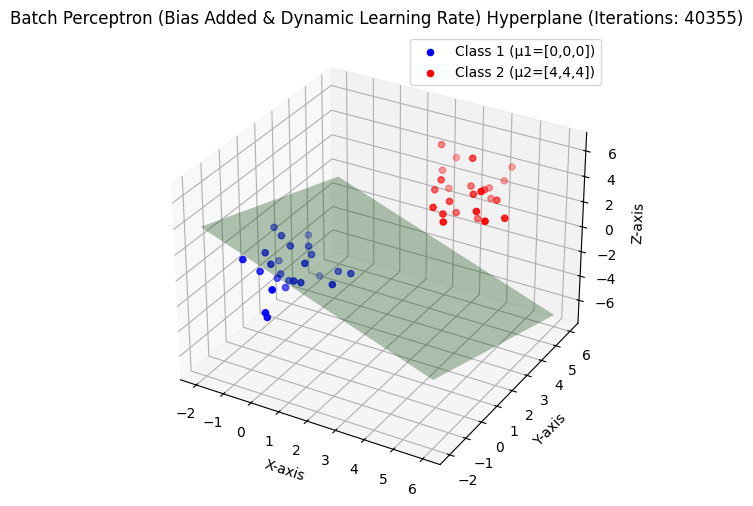

In [ ]:
# Batch Perceptron Algorithm with Iteration Tracking---first implementation
#in this first case, the algorithm did not converge so in the next case,
#we use a stoping criterion theta instead and a dynamic learning rate dependent on the number of iterations
# Batch Perceptron Algorithm with Bias and Iteration Tracking
def batch_perceptron_with_bias(X, y):
    w = np.zeros(X.shape[1])  # Initialize weight vector
    b = 0  # Initialize bias term
    i =1 #iteration count
    while (True):
        misclassified = y * (w @ X.T + b) <= 0  # Find misclassified points (including bias)

        if not np.any(misclassified):  # If no misclassified points, stop
            print(f'Converged at iteration {i}')
            return w, b, i  # Return final weights, bias, and iteration count

        #initialize learning rate as a function of k
        eta=lambda k: 0.1 / (1 + k)

        # Update learning rate using the lambda function
        eta_i = eta(i)  # Learning rate as a function of iteration

        # Update weights and bias
        w += eta_i * np.sum(y[misclassified, None] * X[misclassified], axis=0)  # Update weight vector
        b += eta_i * np.sum(y[misclassified])  # Update bias term
        i+=1
    return w, b, max_iter  # Return weights, bias, and max iterations if not converged

# Train Perceptron with Bias
w_batch, b_batch, iterations = batch_perceptron_with_bias(X, y)

# 3D Visualization of Data and Decision Hyperplane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1=[0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2=[4,4,4])')

# Define hyperplane equation w1*x + w2*y + w3*z + b = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
if w_batch[2] != 0:  # Avoid division by zero
    zz = (-w_batch[0] * xx - w_batch[1] * yy - b_batch) / w_batch[2]
else:
    zz = np.zeros_like(xx)  # In case of vertical hyperplane

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Batch Perceptron (Bias Added & Dynamic Learning Rate) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()

## 7d

In [ ]:
# Step 4: Initialize w0 on a Sphere (radius 0.1). I will denote the resultant unique w  with the 'w_constrained' variable.
# i did not add the bias to this weight vecor  to avoid symmetric learning

radius = 0.1 #initialize radius
w_constrained = np.random.randn(dim) # I generated a random vector
w_constrained /= np.linalg.norm(w_constrained) # normalize to unit length
w_constrained *= radius #scale to desired radius
print(w_constrained)

[ 0.03118501  0.04313094 -0.08465942]


## 7e
In the stochastic perceptron, the algorithm does not converge without a bias. After adding a bias the algorithm converges. With this training data, the algorithm converges faster when using a fixed learning rate with 6 iterations. Using a dynamic learning rate -that is the learning rate is a function of the number of iterations, produces slower convergence of 7 iterations. This might be due to the decay rate, maybe it moves very slowly towards the optimal weight vector solution. Personally, I learnt from this experiment that if you don't have an appropriate decay rate for your learning rate, it is better to stick with the fixed learning rate. I also observed that it converged faster than its respective batch perceptron variants. I also noticed that for the number of times i retried this experiment, the number of iterations needed for convergence kept changing for the stochastic perceptron

i. Dynamic learning rate

Converged at iteration 7


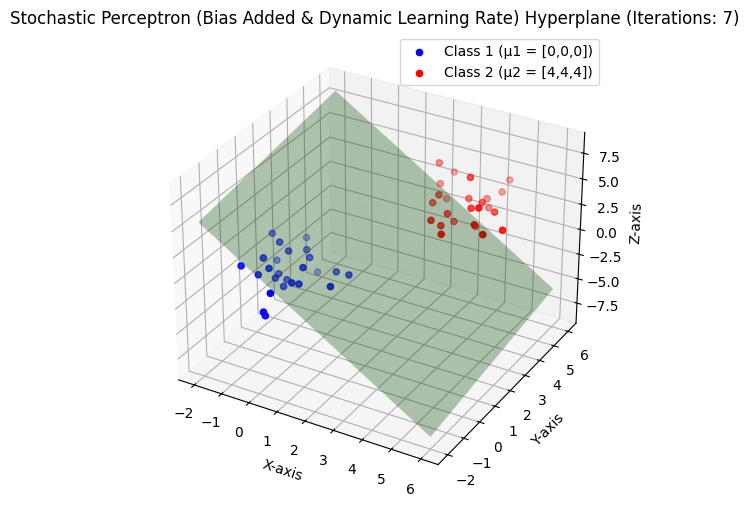

In [ ]:
# Stochastic Perceptron Algorithm with Bias Term without stopping criterion
def stochastic_perceptron_with_bias(X, y, w_init):
    # Add bias term to the data (column of ones)
    bias = 0

    # Initialize weight vector
    w = w_init.copy()
    k = 0  # Iteration counter

    while True:
        # Find misclassified points
        misclassified = np.where(y * (w @ X.T + bias) <= 0)[0]

        if len(misclassified) == 0:  # If no misclassified points, stop
            print(f'Converged at iteration {k}')
            return w, bias, k  # Return final weights and iteration count

        # Randomly select one misclassified point
        i_random = np.random.choice(misclassified)

        #initialize learning rate as a function of k
        eta=lambda k: 0.1 / (1 + k)

        # Update learning rate using the lambda function
        eta_k = eta(k)  # Learning rate as a function of iteration k

        # Update the weight vector
        w += eta_k * y[i_random] * X[i_random]

        #update bias
        bias += eta_k * y[i_random]



        k += 1  # Increment iteration counter

# Create initial weight vector with an extra element for the bias
w0 = w_constrained  # Initial weight vector (including bias term)

# Train Stochastic Perceptron with custom learning rate function
w_stochastic, bias_stochastic, iterations = stochastic_perceptron_with_bias(X, y, w0)

# 3D Visualization of Data and Decision Hyperplane (Including Bias)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1 = [0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2 = [4,4,4])')

# Define hyperplane equation: w1*x + w2*y + w3*z + w0 = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
zz = (-w_stochastic[0] * xx - w_stochastic[1] * yy - bias_stochastic) / w_stochastic[2]

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Stochastic Perceptron (Bias Added & Dynamic Learning Rate) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()


ii. Fixed learning rate

Converged at iteration 6


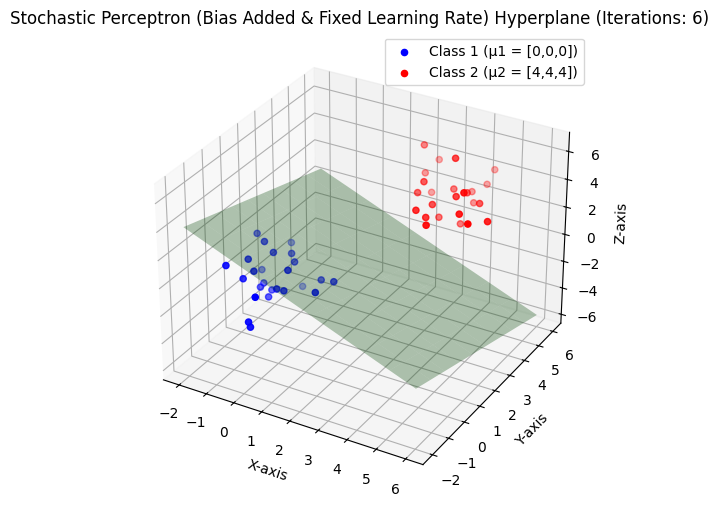

In [ ]:
# Stochastic Perceptron Algorithm with Bias Term without stopping criterion
def stochastic_perceptron_with_bias_static_learning_rate(X, y, w_init):
    # Add bias term to the data (column of ones)
    bias = 0

    # Initialize weight vector
    w = w_init.copy()
    k = 0  # Iteration counter

    while True:
        # Find misclassified points
        misclassified = np.where(y * (w @ X.T + bias) <= 0)[0]

        if len(misclassified) == 0:  # If no misclassified points, stop
            print(f'Converged at iteration {k}')
            return w, bias, k  # Return final weights and iteration count

        # Randomly select one misclassified point
        i_random = np.random.choice(misclassified)

        #initialize static learning rate as a function of k
        eta=0.1

        # Update the weight vector
        w += eta * y[i_random] * X[i_random]

        #update bias
        bias += eta * y[i_random]

        k += 1  # Increment iteration counter

# Create initial weight vector with an extra element for the bias
w0 = w_constrained  # Initial weight vector (including bias term)

# Train Stochastic Perceptron with custom learning rate function
w_stochastic, bias_stochastic, iterations = stochastic_perceptron_with_bias_static_learning_rate(X, y, w0)

# 3D Visualization of Data and Decision Hyperplane (Including Bias)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1 = [0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2 = [4,4,4])')

# Define hyperplane equation: w1*x + w2*y + w3*z + w0 = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
zz = (-w_stochastic[0] * xx - w_stochastic[1] * yy - bias_stochastic) / w_stochastic[2]

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Stochastic Perceptron (Bias Added & Fixed Learning Rate) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()


## 7f

In [ ]:

def compute_gamma_and_alpha(X, y, w_constrained, w_solution, beta_squared):
    """
    Compute gamma, alpha, and k_0 based on the given formula.

    Args:
    - X : Data points, shape (n_samples, n_features)
    - y : Labels, shape (n_samples,)
    - w_constrained : Weight vector of constrained
    - w_solution : solution Weight vector from stochastic perceptron with fixed learning rate

    - beta_squared (float): A constant parameter used to compute alpha

    Returns:
    - gamma (float): Minimum value of w^T * x_i * y_i
    - alpha (float): Computed as beta^2 / gamma
    - k_0 (float): Measure of the weight vector change
    """
    # Compute w^T * x_i * y_i for each sample
    product = np.dot(X, w_solution.T) * y  # Shape: (n_samples,)

    # Compute gamma as the minimum value of the product
    gamma = np.min(product)

    # Compute alpha using the formula
    alpha = beta_squared / gamma

    # Compute k_0: the squared Euclidean distance between w0 and alpha*w, normalized by beta^2
    w_scaled = alpha * w_solution
    k_0 = np.linalg.norm(w_constrained - w_solution)**2 / (beta_squared)

    return gamma, alpha, k_0

# Initialize weight vector and beta
w_0 = w_constrained
w_solution = w_stochastic
beta_squared = beta_2  # Some value of

# Compute gamma, alpha, and k_0
gamma, alpha, k_0 = compute_gamma_and_alpha(X, y, w_0, w_solution, beta_squared)

# Print the results
print(f"Gamma: {gamma}")
print(f"Alpha: {alpha}")
print(f"K_0: {k_0}")


Gamma: -0.28281605272136445
Alpha: -261.82233728179364
K_0: 0.001843750410806704


## 7g
The value
𝑘0
  is a normalized distance metric that quantifies how far the initial weight vector
𝑤0

​
  is from the scaled final weight vector
𝛼
𝑤. k0 for stochastic perceptron with fixed learning rate is 0.00184. this means that the distance from the initialized constrained weight vector and the final solution is not that much. since the algorithm took 6 iterations to converge. Since this value is relatively small, it suggests that the weights have changed only a little from their initial state after training, which may imply that the perceptron has learned or adjusted its weights in small steps (possibly due to a smaller learning rate or smaller adjustments based on the margin).It could indicate that the problem is simple (e.g. linearly separable data). in thesame vain if we compute k_0 for stochastic perceptron with dynamic learning rate, the value will be higher since it took more number of iterations to converge.

Experimenting with different initialization strategies for w to repeat both batch and stochastic perceptron algorithm

i. Dynamic stochastic perceptron ---initializing w randomly

Converged at iteration 183387


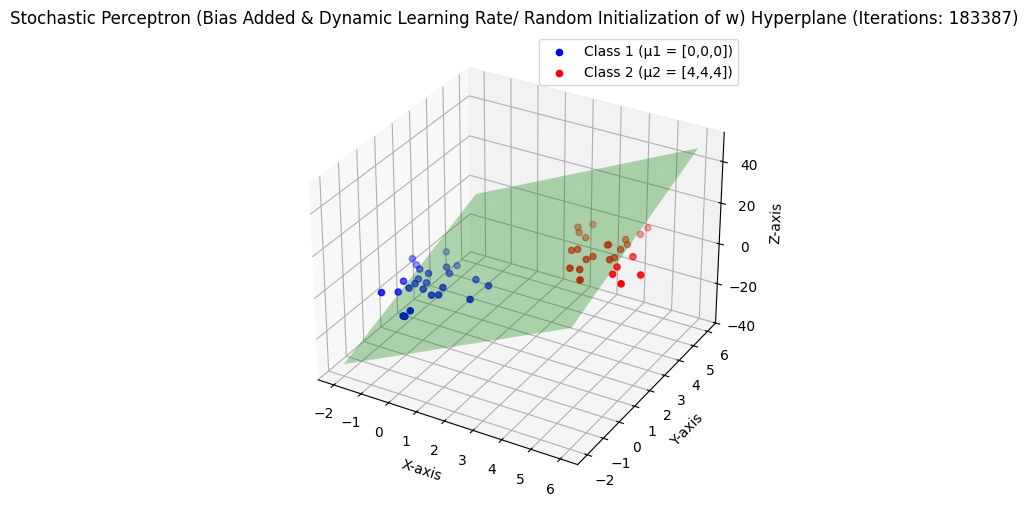

In [ ]:
# Stochastic Perceptron Algorithm with Bias Term without stopping criterion
def stochastic_perceptron_with_bias(X, y,w):
    # Add bias term to the data (column of ones)
    bias = 0

    # Initialize weight vector with random values
    k = 0  # Iteration counter

    while True:
        # Find misclassified points
        misclassified = np.where(y * (w @ X.T + bias) <= 0)[0]

        if len(misclassified) == 0:  # If no misclassified points, stop
            print(f'Converged at iteration {k}')
            return w, bias, k  # Return final weights and iteration count

        # Randomly select one misclassified point
        i_random = np.random.choice(misclassified)

        # Initialize learning rate as a function of k
        eta = lambda k: 0.1 / (1 + k)

        # Update learning rate using the lambda function
        eta_k = eta(k)  # Learning rate as a function of iteration k

        # Update the weight vector
        w += eta_k * y[i_random] * X[i_random]

        # Update bias
        bias += eta_k * y[i_random]

        k += 1  # Increment iteration counter

w_rand =np.random.randn(X.shape[1])  # Random initialization of weights (excluding bias)

# Train Stochastic Perceptron with random weight initialization
w_stochastic, bias_stochastic, iterations = stochastic_perceptron_with_bias(X, y,w_rand)

# 3D Visualization of Data and Decision Hyperplane (Including Bias)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1 = [0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2 = [4,4,4])')

# Define hyperplane equation: w1*x + w2*y + w3*z + w0 = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
zz = (-w_stochastic[0] * xx - w_stochastic[1] * yy - bias_stochastic) / w_stochastic[2]

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Stochastic Perceptron (Bias Added & Dynamic Learning Rate/ Random Initialization of w) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()

ii. Fixed learning rate


Converged at iteration 15


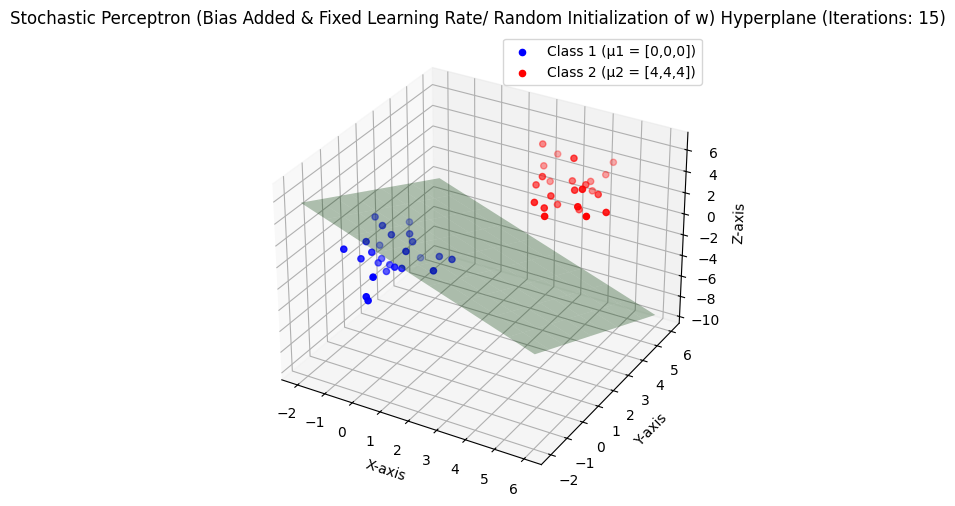

In [ ]:
# Stochastic Perceptron Algorithm with Bias Term without stopping criterion
def stochastic_perceptron_with_bias_static_learning_rate(X, y, w):
    # Add bias term to the data (column of ones)
    bias = 0

    # Initialize weight vector randomly
    w = np.random.randn(X.shape[1])  # Random initialization of weights (excluding bias)
    k = 0  # Iteration counter

    while True:
        # Find misclassified points
        misclassified = np.where(y * (w @ X.T + bias) <= 0)[0]

        if len(misclassified) == 0:  # If no misclassified points, stop
            print(f'Converged at iteration {k}')
            return w, bias, k  # Return final weights and iteration count

        # Randomly select one misclassified point
        i_random = np.random.choice(misclassified)

        # Static learning rate
        eta = 0.1

        # Update the weight vector
        w += eta * y[i_random] * X[i_random]

        # Update bias
        bias += eta * y[i_random]

        k += 1  # Increment iteration counter


# Train Stochastic Perceptron with random weight initialization
w_stochastic, bias_stochastic, iterations = stochastic_perceptron_with_bias_static_learning_rate(X, y,w_rand)

# 3D Visualization of Data and Decision Hyperplane (Including Bias)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='blue', label='Class 1 (µ1 = [0,0,0])')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], color='red', label='Class 2 (µ2 = [4,4,4])')

# Define hyperplane equation: w1*x + w2*y + w3*z + w0 = 0
xx, yy = np.meshgrid(np.linspace(-2, 6, 10), np.linspace(-2, 6, 10))
zz = (-w_stochastic[0] * xx - w_stochastic[1] * yy - bias_stochastic) / w_stochastic[2]

# Plot hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Labels and Title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Stochastic Perceptron (Bias Added & Fixed Learning Rate/ Random Initialization of w) Hyperplane (Iterations: {iterations})')
ax.legend()

plt.show()

iii. Computing k_0 using new random initialization of w and solution vector from fixed stochastic perceptron

In [ ]:

def compute_gamma_and_alpha(X, y, w_constrained, w_solution, beta_squared):
    """
    Compute gamma, alpha, and k_0 based on the given formula.

    Args:
    - X : Data points, shape (n_samples, n_features)
    - y : Labels, shape (n_samples,)
    - w_constrained : Weight vector of constrained
    - w_solution : solution Weight vector from stochastic perceptron with fixed learning rate

    - beta_squared (float): A constant parameter used to compute alpha

    Returns:
    - gamma (float): Minimum value of w^T * x_i * y_i
    - alpha (float): Computed as beta^2 / gamma
    - k_0 (float): Measure of the weight vector change
    """
    # Compute w^T * x_i * y_i for each sample
    product = np.dot(X, w_solution.T) * y  # Shape: (n_samples,)

    # Compute gamma as the minimum value of the product
    gamma = np.min(product)

    # Compute alpha using the formula
    alpha = beta_squared / gamma

    # Compute k_0: the squared Euclidean distance between w0 and alpha*w, normalized by beta^2
    w_scaled = alpha * w_solution
    k_0 = np.linalg.norm(w_constrained - w_solution)**2 / (beta_squared)

    return gamma, alpha, k_0

# Initialize weight vector and beta
w_0 = w_rand
w_solution = w_stochastic
beta_squared = beta_2  # Some value of

# Compute gamma, alpha, and k_0
gamma, alpha, k_0 = compute_gamma_and_alpha(X, y, w_0, w_solution, beta_squared)

# Print the results
print(f"Gamma: {gamma}")
print(f"Alpha: {alpha}")
print(f"K_0: {k_0}")


Gamma: -0.6539703674364522
Alpha: -113.2276990386938
K_0: 0.0038350970555437406


## 7g
The value
𝑘0
  is a normalized distance metric that quantifies how far the initial random weight vector
𝑤0

​
  is from the solution weight vector
𝛼
𝑤. k0 for stochastic perceptron with fixed learning rate is 0.00383. this means that the distance from the initialized constrained weight vector and the final solution is not that much. since the algorithm took 6 iterations to converge. But it is still larger than when we used all zeros to innitialize the weight vector earlier. Since this value is relatively small, it suggests that the weights have changed only a little from their initial state after training, which may imply that the perceptron has learned or adjusted its weights in small steps (possibly due to a smaller learning rate or smaller adjustments based on the margin).It could indicate that the problem is simple (e.g. linearly separable data). in thesame vain if we compute k_0 for stochastic perceptron with dynamic learning rate, the value will be higher since it took more number of iterations to converge. In this case, initalizing w0 as a zero vector performed better than randomized initialization